<a href="https://colab.research.google.com/github/Emueni22/Emueni22/blob/main/Nairobi_Hospital_Hypothyroidism_Test_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UNDERSTANDING THE CONTEXT**

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patient.

Hypothyroidism happens when the thyroid gland doesn't make enough thyroid hormone. This condition also is called underactive thyroid. Hypothyroidism may not cause noticeable symptoms in its early stages. Over time, hypothyroidism that isn't treated can lead to other health problems, such as high cholesterol and heart problems.

Blood tests are used to diagnose hypothyroidism. Treatment with thyroid hormone medicine usually is simple, safe and effective once you and your health care provider find the right dosage for you.

**Factors that increase a person's risk of developing hypothyroidism include:**

1. Being female
2. Being of an older age
3. Having a family history of Hashimoto's thyroiditis or another autoimmune disease
4. Having a personal history of an autoimmune disease (for example, adrenal insufficiency, rheumatoid arthritis, or type 1 diabetes)
5. Being pregnant or postpartum
6. Too much or too little iodine consumption
7. Treated with radioactive iodine
8. Underwent thyroid surgery
9. Treated with certain medications (for example, lithium for bipolar disorder).

More inforamtion can be accessed from https://www.verywellhealth.com/hypothyroidism-causes-risk-factors-3231721



# **RESEARCH QUESTION**
Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

**SPECIFIC QUESTION**


1.  Whats the probability that a patient on hyrexoxine has hypothyroid.
2.  Does age have any contribution to probability of a patient having hypothyroid.
3.   Which sex has most patients with hypothyroidism.






# **DATA UNDERSTANDING**
Using the hypothoroid dataset which contains the following Columns:


*   Age
*   Sex
*   on_thyrexoxine
*   query_on_thyroxine
*   on_antithyroid_medicationthyroid_surgery
*  query_hypothyroid
*   pregnant 
*  sick
*   tumour
*  lithium
*  goitre
*  TSH_measured
*  TSH
*  T3_measured
*  T3
*  TT4_measured
*  TT4

M = Male; F = Female; t = True; f = False; TSH = Thyroid Stimulating Hormone; T3 = Triiodothyronine
Hormone; TT4 = Thyroxine Hormone; T4U = Thyroxine Utilization Rate;FTI = Free Thyroxine Index


# **METRIC OF SUCCESS**
The project will be termed a success if it comes up with a modet that:

1. Can determine whether or not the patient's symptoms indicate that the patient has hypothyroid with an accuracy score of more than **90%**.
2. Can identify the independent variables that affect Hypothyroidism.

# **PROCESS FLOW**
1. Importing the neccesesary libraries
2. Loading the data set.
3. Checking for the features of data set, handling outliers and anomalies
4. Exploratory data analysis
5. Modeling using decision trees
6. SVM Modeling
7. Conclusion and Recommendation




In [46]:
# Importing the librarries to be used

import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [47]:
# loading our data set.

hypothyroid = pd.read_csv('hypothyroid.csv')

#Viewing the first rows of our data set

hypothyroid.head()


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [48]:
#Viewing the last rows of our data set

hypothyroid.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,...,y,1.80,y,139,y,0.97,y,143,n,?


In [49]:
#Checking the shape and information of our data set

hypothyroid.info()

# The data set has 3162 rows and 26 colums.
# There are no null values the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [50]:
#Describing the data.

hypothyroid.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,...,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,...,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,...,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,...,2468,695,2914,249,2915,248,2916,247,2903,2903


# DATA CLEANING

In [51]:
# Replacing the special character '?' with '0' since special characters arent used in modeling/analysis.

hypothyroid = hypothyroid.replace(['?'], np.nan)
hypothyroid.isnull().sum().sum()
     

5329

In [52]:
#viewing the null values per column
hypothyroid.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [53]:
# Changing the columns to the correct data types
# SInce all the dtypes are object we check the unique values in each column to determie the correct data type.

for column in hypothyroid.columns:
  print(column)
  print(hypothyroid[column].unique())
  print('\n............................')      # Creating a new line filled with . to separate the columns
     

status
['hypothyroid' 'negative']

............................
age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' nan '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']

............................
sex
['M' 'F' nan]

............................
on_thyroxine
['f' 't']

............................
query_on_thyroxine
['f' 't']

............................
on_antithyroid_medication
['f' 't']

............................
thyroid_surgery
['f' 't']

............................
query_hypothyroid
['f' 't']

............................
query_hyperthyroid
['f' 't']

............................
pregnant
['f' 't']

..................

The code shows that:

**Numerical columns** = [ ' age ' , ' TSH ' , ' T3 ' , ' TT4 ' , ' T4U ' , ' FTI ' , ' TBG ' ]

**Categorical columns** = [ ' sex ' , ' on_thyroxine ' ,' query_on_thyroxine ' ,' on_antithyroid_medication ' , ' thyroid_surgery ' , ' query_hypothyroid ' , ' query_hyperthyroid ' , ' pregnant ' , 'sick ' , ' tumor ', ' lithium ' , ' goitre ' , ' TSH_measured ', ' T3_measured ' , ' TT4_measured ' , ' T4U_measured ' , ' FTI_measured' , ' TBG_measured ' ]

In [54]:
# Changing the columns to the correct data types

#creating a copy
hypothyroid_1 = hypothyroid

#categorical columns array
categorical_columns = ['sex', 'on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                       'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
                       'sick','tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 
                       'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']

#numerical columns array 
numerical_columns = ['age','TSH','T3', 'TT4', 'T4U', 'FTI' , 'TBG']


# Using a conditional for loop to convert each columns into the right data types

for column in hypothyroid_1.columns:
  if column in numerical_columns:
    hypothyroid_1[column]= pd.to_numeric(hypothyroid_1[column])
  
  else:
    hypothyroid_1[column] = hypothyroid_1[column].astype('category')
    
    
# checking the data types to confirm changes

hypothyroid_1.dtypes
     
    


status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

**Handling Missing Values**

In [55]:
# Dropping the TBG and TBG measured colummn since since TBG Wasn't necessarly measured in this test.

hypothyroid_1 = hypothyroid_1.drop(['TBG','TBG_measured'], axis =1)
hypothyroid_1.head()



,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,...,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,...,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,...,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,...,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,...,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0


In [56]:
# Replacing the null values in age column with mean since most of the people in the test seem to be in the same age group

hypothyroid_2 = hypothyroid_1
hypothyroid_2['age'] = hypothyroid_1['age'].fillna(hypothyroid_1['age'].mean(), axis = 0)

In [57]:
# Dropping rows with null values in the sex column, since sex is one of the major factors affecting hypothroidism and we cant guess it.

hypothyroid_3 = hypothyroid_2.dropna(subset=['sex'])


In [58]:
#  Checking our dataset  info

hypothyroid_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3090 entries, 0 to 3162
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   status                     3090 non-null   category
 1   age                        3090 non-null   float64 
 2   sex                        3090 non-null   category
 3   on_thyroxine               3090 non-null   category
 4   query_on_thyroxine         3090 non-null   category
 5   on_antithyroid_medication  3090 non-null   category
 6   thyroid_surgery            3090 non-null   category
 7   query_hypothyroid          3090 non-null   category
 8   query_hyperthyroid         3090 non-null   category
 9   pregnant                   3090 non-null   category
 10  sick                       3090 non-null   category
 11  tumor                      3090 non-null   category
 12  lithium                    3090 non-null   category
 13  goitre                     3090 n

In [59]:
#From the above code its notable that all the numerical values have missing values
#defining the  numerical columns to use.

num_columns = ['TSH','T3', 'TT4', 'T4U', 'FTI']

hypothyroid_4 = hypothyroid_3

#dropping the null values and assigning the resultant values to a new dataframe
hypothyroid_4[num_columns] = hypothyroid_3[num_columns].fillna(0)

**Handling Duplicates**

In [60]:
# Chexking for duplicates and dropping them

hypothyroid_4.duplicated().sum()

# Dropping the duplicates
hypothyroid_5 = hypothyroid_4.drop_duplicates()
hypothyroid_5.shape
     

(2938, 24)

**Handling Outliers**

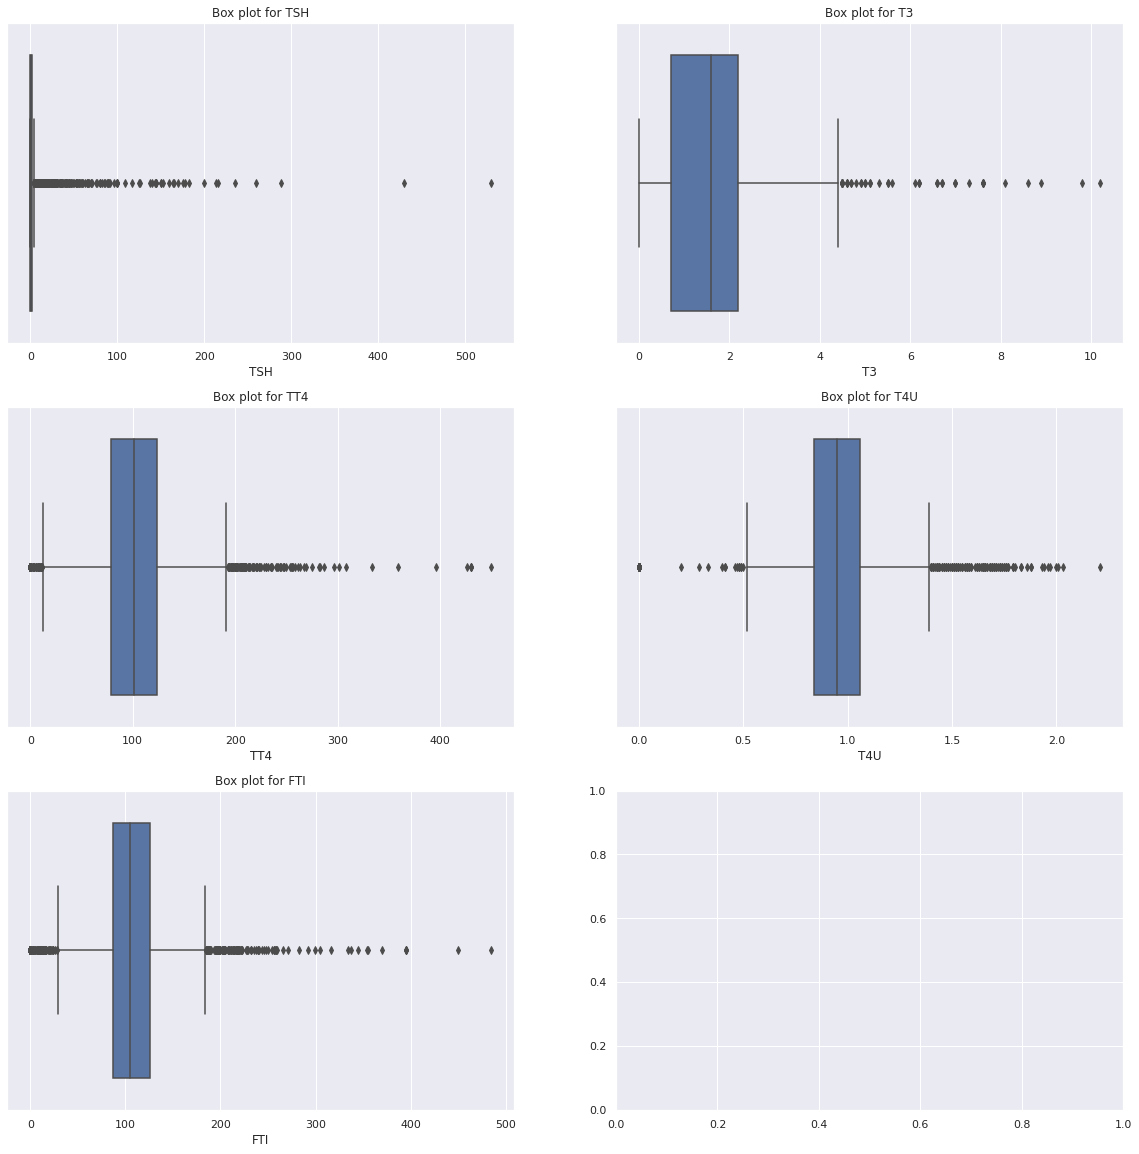

In [61]:
# We will use a boxplot to check for outliers
# we will use the list of measures/tests earlier created


# Specifying the chart we will use to plot the boxplots
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 20))


sb.set(style = 'whitegrid', context = 'notebook')

# Using a for loop to iterate through the measured list and plot respective boxplots
for ax, data, name in zip(axes.flatten(), hypothyroid_5, num_columns):
  sb.boxplot(hypothyroid_5[name], ax = ax)
  ax.set_title('Box plot for '+ name)
  
plt.show()

Since all this are possible measurements we leave them

# **EXPLORATORY DATA ANALYSIS**

**Univariate Analysis**

a) **Numerical Columns Analysis**

In [62]:
HYPO = hypothyroid[numerical_columns]
HYPO.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,2717.000000,2695.000000,2468.000000,2914.000000,2915.000000,2916.000000,260.000000
mean,51.154214,5.923180,1.939749,108.850000,0.978199,115.397771,31.283077
std,19.294405,23.899467,0.996773,45.485419,0.226580,60.239572,19.224659
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,1.400000,83.000000,0.850000,91.000000,21.000000
50%,54.000000,0.700000,1.800000,104.000000,0.960000,107.000000,28.000000
75%,67.000000,2.300000,2.300000,128.000000,1.065000,129.000000,34.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000,122.000000


The average age of the patients is **51.15**, implying that the majority of
the patients were elderly. The youngest person was 1 year old, and the oldest person was 98 years old.
The age distribution of the data is skewed, indicating that the population with a low age is absent. The
standard deviation is 19.3, indicating the sparseness of the age group, which ranges from 57 to 73 years
old. TSH mean was **5.9 mIU/L**, indicating that most patients' TSH levels were not normal. TSH levels
should be between** 0.5 and 5.0 mIU/L. in order to be considered normal. TSH had a minimum value of
0.00 mIU/L and a maximum value of 530.0 mIU/L. The mean T3 value was 1.94 nmol/L, with a
minimum of 0.00 nmol/L and a maximum of 10.2 nmol/L . The mean value of TT4 is 108.85. The
maximum value of TT4 is 450 and the minimum of TT4 is 2. In the case of T4U, the mean value is 0.98.

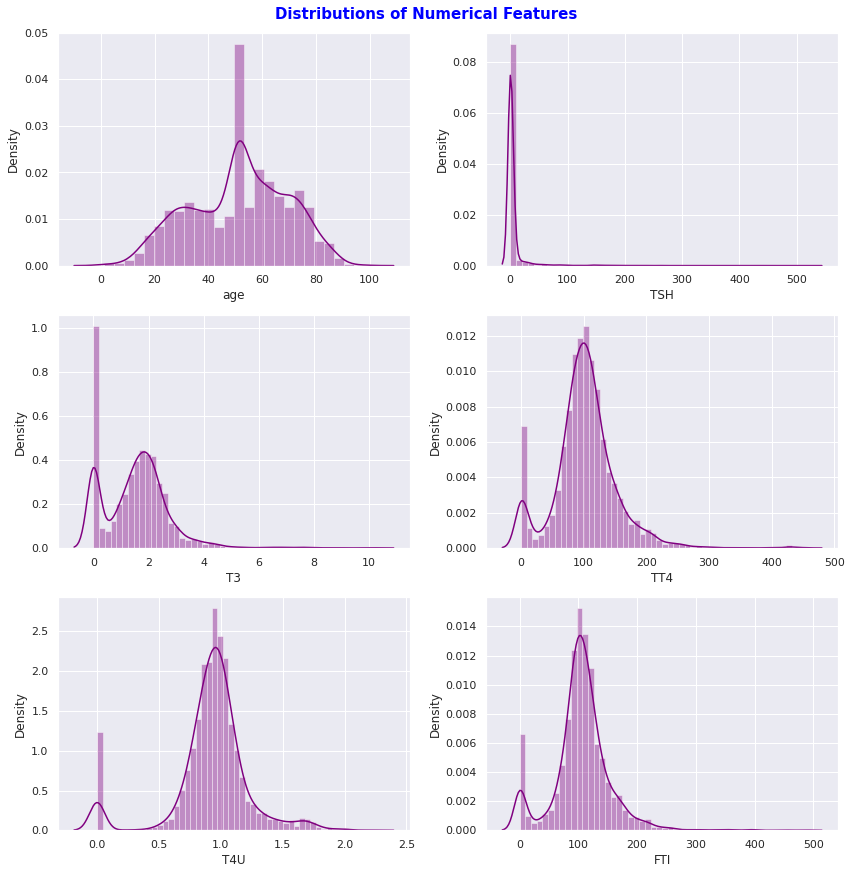

In [63]:
# Histograms of the numerical columns
# these are columns represent the measures of the thyroid tests.

# First we create an array of the numerical columns

numerical_columns = ['age','TSH','T3', 'TT4', 'T4U', 'FTI' ]

#visualizing the distributions using histograms
sb.set_style('darkgrid')
fig, axes = plt.subplots(nrows=3, ncols = 2, figsize = (12, 12))
fig.suptitle('Distributions of Numerical Features', y= 1.01, color = 'blue', fontsize = 15, weight = 'bold')

for ax, data, name in zip(axes.flatten(), hypothyroid_5, numerical_columns):
  sb.distplot(hypothyroid_5[name], ax = ax, kde = True, color = 'purple')
plt.tight_layout()
plt.show()

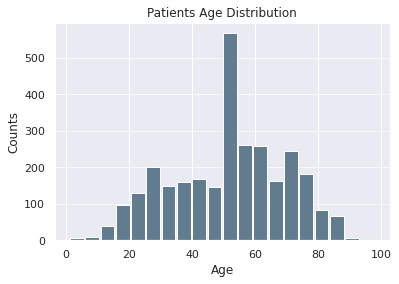

In [64]:
#visualizing age dirstibution

age = hypothyroid_5['age']

age.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Patients Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

Highest population tested were between ages 40 -60.
The distribution is fairly normal more concentrated around the mean

**b) Categorical Data Analysis**

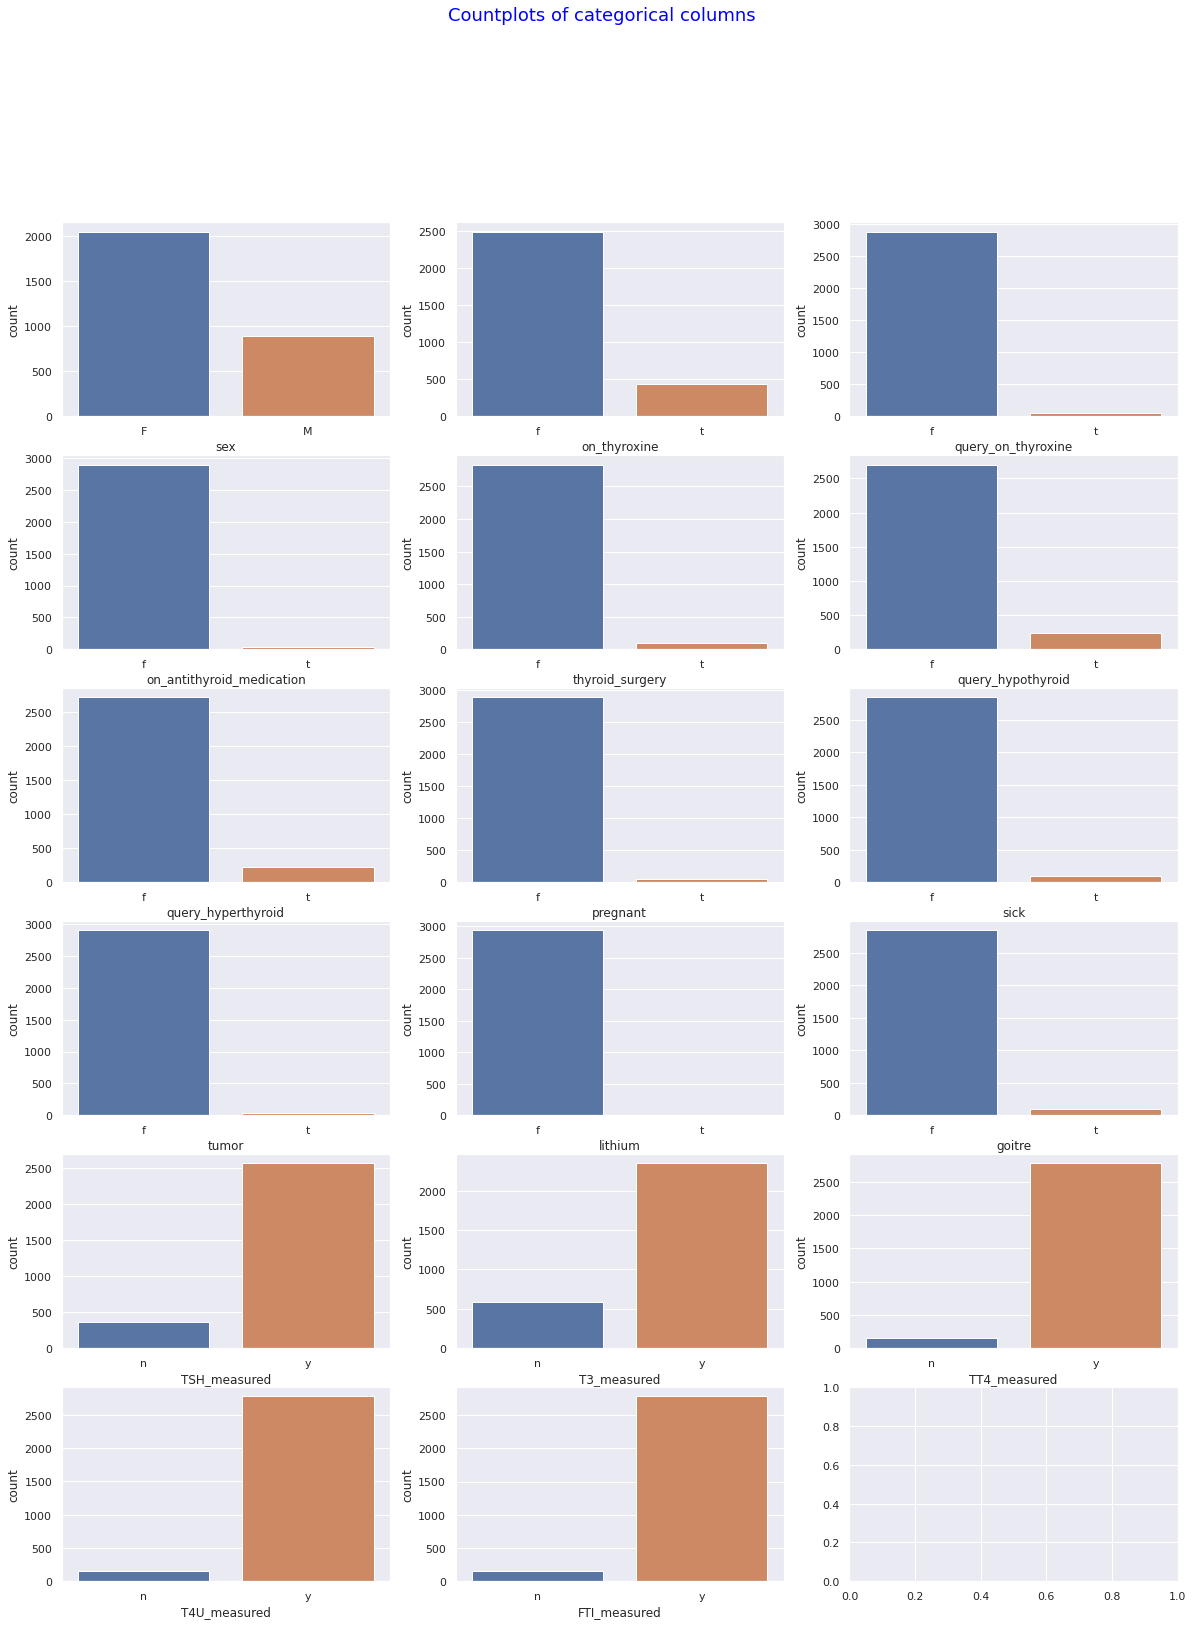

In [65]:
# Countplot of categorical columns in the dataset
# creating a list of the categorical columns in the dataset

cat_columnns =[ 'sex', 'on_thyroxine', 'query_on_thyroxine',
      'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
      'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
      'TSH_measured', 'T3_measured', 'TT4_measured',
      'T4U_measured', 'FTI_measured' ]


sb.set(style = 'darkgrid', context = 'notebook')
corr = hypothyroid_5.corr()
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20,25))
plt.suptitle('Countplots of categorical columns', fontsize = 18, y = 1, color = 'blue')
for ax, data, column in zip(axes.flatten(), hypothyroid_5, cat_columnns):
   sb.countplot(hypothyroid_5[column], ax=ax)

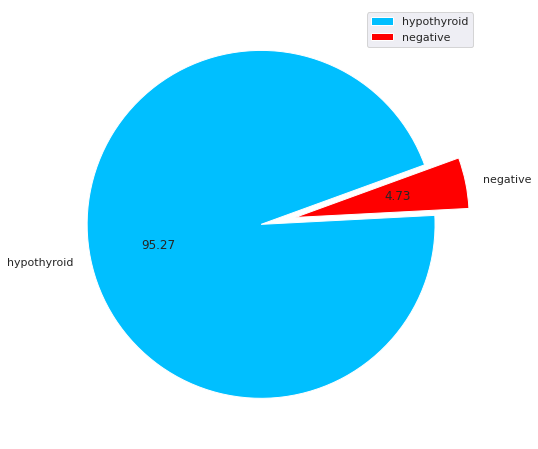

In [66]:
plt.figure(figsize=(8,8))
plt.pie(x=hypothyroid_5.status.value_counts(),
        labels=['hypothyroid','negative'],
        startangle = 20,
        colors=['deepskyblue','red'],
        autopct='%.2f',
        explode=[0,0.2]
       );
plt.legend();

Higher perecentage of the population tested had hypothyroid **95.27%**

**BIVARIATE ANALYSIS**

a) Numerical vs Numerical

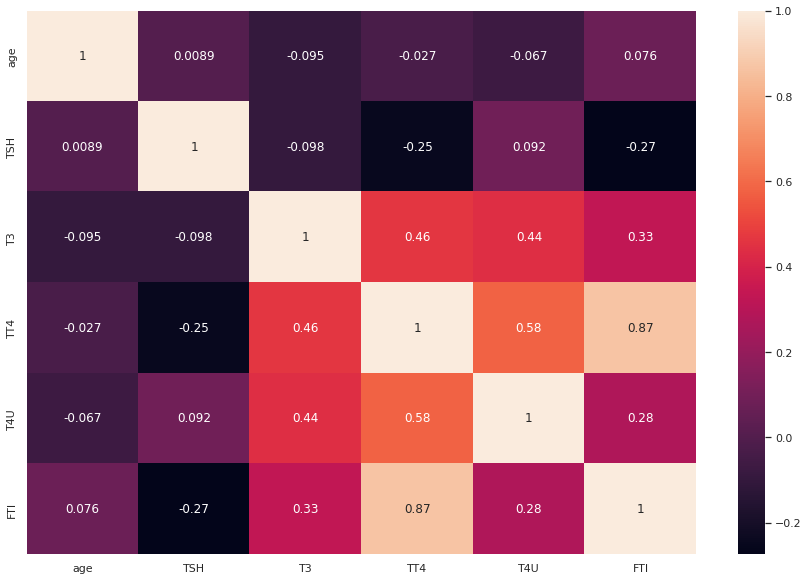

In [67]:
# Displaying the correlations between the variables using a heat map

plt.figure(figsize=(15,10))
sb.heatmap(corr, annot = True)
plt.show()


High Correlation between Free Thyroxine Index (FTI) and Thyroxine Hormone (TT4) **0.87**
The lowest correlation is between Thyroxine Hormone and age **-0.027**

b) Numerical vs Categorical

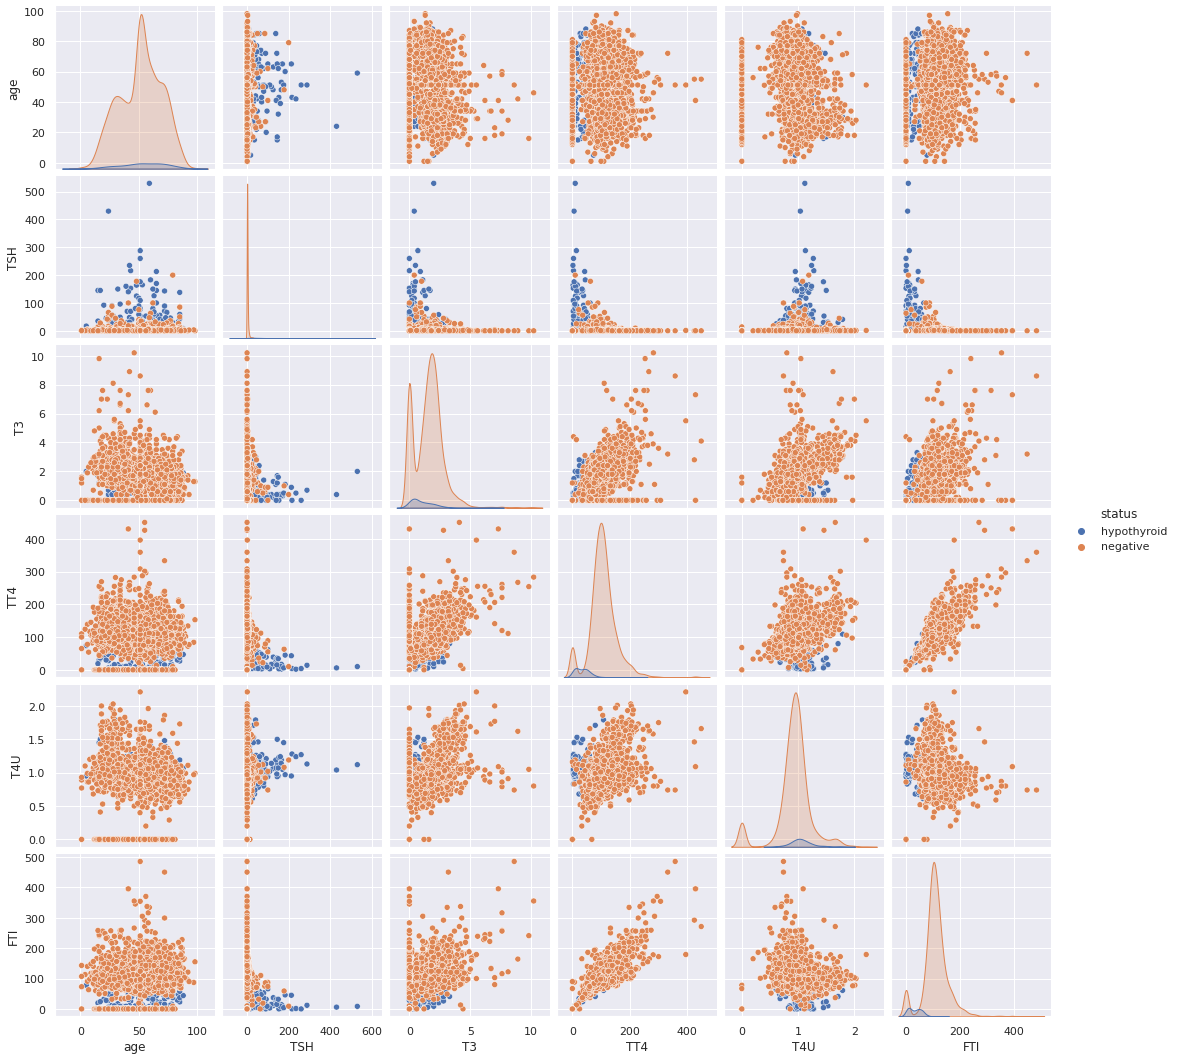

In [68]:
#Visualization using pairplot
# With the argument 'hue' to distinguish when the condition (hpyothyroidism) is negative or postive


numerical_columns = ['age','TSH','T3', 'TT4', 'T4U', 'FTI' ]

sb.pairplot(hypothyroid_5, kind="scatter", diag_kind="kde", vars=numerical_columns, hue="status")
plt.show()


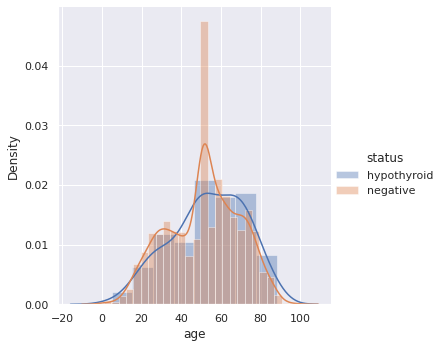

In [69]:
# Checking for the corrrelation between age and status

sb.FacetGrid(hypothyroid_5, hue = 'status', size = 5). map(sb.distplot, "age").add_legend()

Most people below 40 are negative while the population above 50 have more Hypothyroid  positive status.

c) Categorical vs Categorical

In [70]:
# Describe the categorical data in our data set

hypothyroid_5.describe(include='category')


,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured
count,2938,2938,2938,2938,2938,2938,2938,2938,2938,2938,2938,2938,2938,2938,2938,2938,2938,2938
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,negative,F,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y
freq,2799,2049,2497,2883,2896,2837,2704,2714,2878,2842,2898,2936,2843,2570,2345,2778,2779,2780


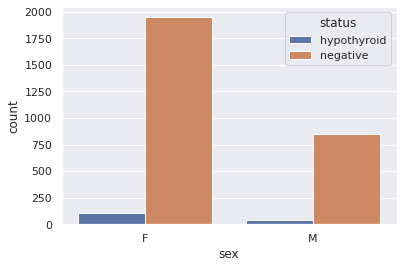

In [71]:
# Checking for the corrrelation between sex and status

sb.countplot(data=hypothyroid_5, x= 'sex', hue = 'status')

Data is inconclusive

# MODELLING

**Feature Selection**

In [72]:
# Encoding the categorical features

categorical_columns = ['sex', 'on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                       'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
                       'sick','tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 
                       'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']

encode = {"status": {"hypothyroid":1, "negative":0},"sex": {"F":1, "M":0}, "on_thyroxine": {"f":1, "t":0},"query_on_thyroxine": {"f":1, "t":0},
          "on_antithyroid_medication":{"f":1, "t":0}, "thyroid_surgery": {"f":1, "t":0},"query_hyperthyroid":{"f":1, "t":0},
          "query_hypothyroid":{"f":1, "t":0}, "pregnant": {"f":1, "t":0}, "sick": {"f":1, "t":0},"tumor": {"f":1, "t":0},
          "lithium'":{"f":1, "t":0}, "goitre": {"f":1, "t":0}}


In [73]:
hypothyroid_5.replace(encode, inplace = True)
hypothyroid_5.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,1,72.0,0,1,1,1,1,1,1,1,...,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0
1,1,15.0,1,0,1,1,1,1,1,1,...,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0
2,1,24.0,0,1,1,1,1,1,1,1,...,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0
3,1,24.0,1,1,1,1,1,1,1,1,...,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0
4,1,77.0,0,1,1,1,1,1,1,1,...,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0


In [74]:
# Dropping unnecessary columns

hypothyroid_5.drop(['TSH_measured', 'T3_measured','TT4_measured','T4U_measured','FTI_measured'],axis=1, inplace = True)

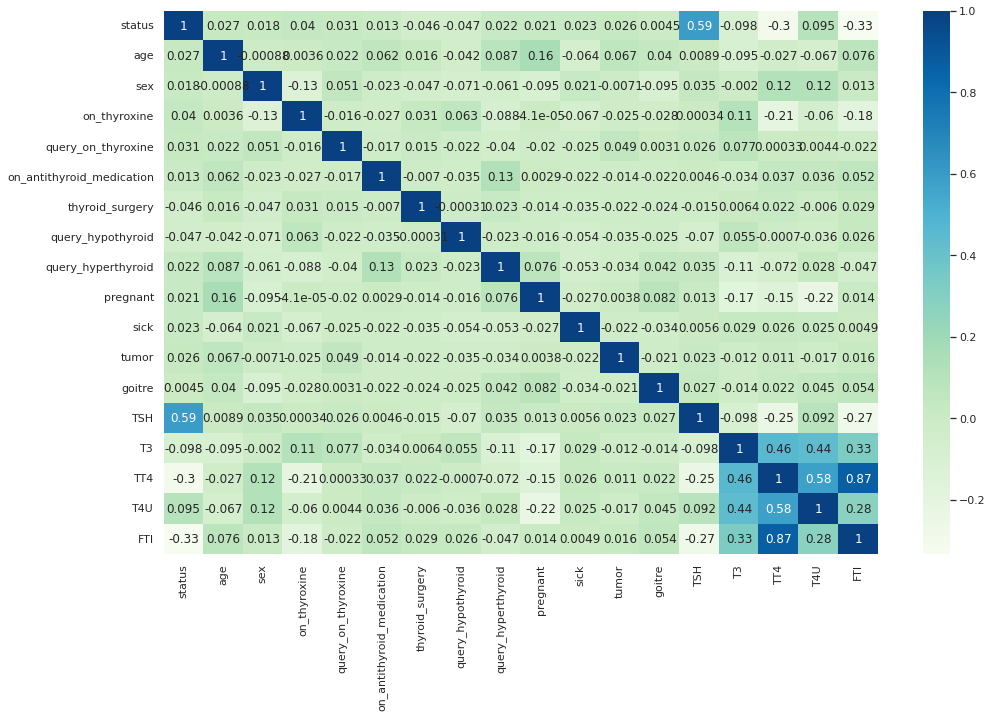

In [75]:
# Checking the correlation of the entire data set
# Plot the correlation heatmap

plt.figure(figsize = (16,10))
sb.heatmap(hypothyroid_5.corr(), cmap="GnBu", annot=True);


The greatest correlation is between TT4 and FTI (**0.87)**

TSH has a great correlation **(0.58)** with the satus i.e if either a person is hypothyroid or negative.

Though we know that sex and age are likely to have a strong correlation with the satus, according to our matrix the correlations are low **(0.018 & 0.027)**respectively. Feature selection needs to be used in order to get the best features to use for our models.

# **LOGISTIC REGRESSION**

Using this as our baseline model



In [76]:
from sklearn.linear_model import LogisticRegression
# To predict if someone has hypothyoididsm or not we use the staus column as our Y

X = hypothyroid_5.drop('status', axis=1)

X = pd.get_dummies(X)

y = hypothyroid_5.status
# Split the independent and dependent variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)

In [77]:
print('accuracy_score:',accuracy_score (y_test , y_pred))
print('F1_score, average = weighted:',f1_score(y_test, y_pred, average='weighted'))

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

accuracy_score: 0.981859410430839
F1_score, average = weighted: 0.9804497516378903


array([[843,   3],
       [ 13,  23]])

The Baseline Model has an accuracy score of 98% as seen from the F1 score and weighted score.

Weighted: Calculates metrics for each label, and find their average weighted by support (the number of true instances for each label)

# **Approach 1: Decision Trees**

### **a) Random Forest**

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Split the independent and dependent variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [79]:
# Training and Cross Validation
# Import RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 10, max_depth=5)

forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


CF = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

CF.describe()


,Actual,Predicted
count,882.000000,882.000000
mean,0.040816,0.034014
std,0.197977,0.181367
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [80]:
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
print("R2 score : %.2f" % r2_score(y_test,y_pred))

print('accuracy_score:',accuracy_score (y_test , y_pred))

print('F1_score:',f1_score(y_test, y_pred))


R2 score : 0.77
accuracy_score: 0.9909297052154195
F1_score: 0.8787878787878789


In [81]:
#Assesinfg the performance of our model
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.009070294784580499
Mean Squared Error: 0.009070294784580499
Root Mean Squared Error: 0.09523809523809523


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


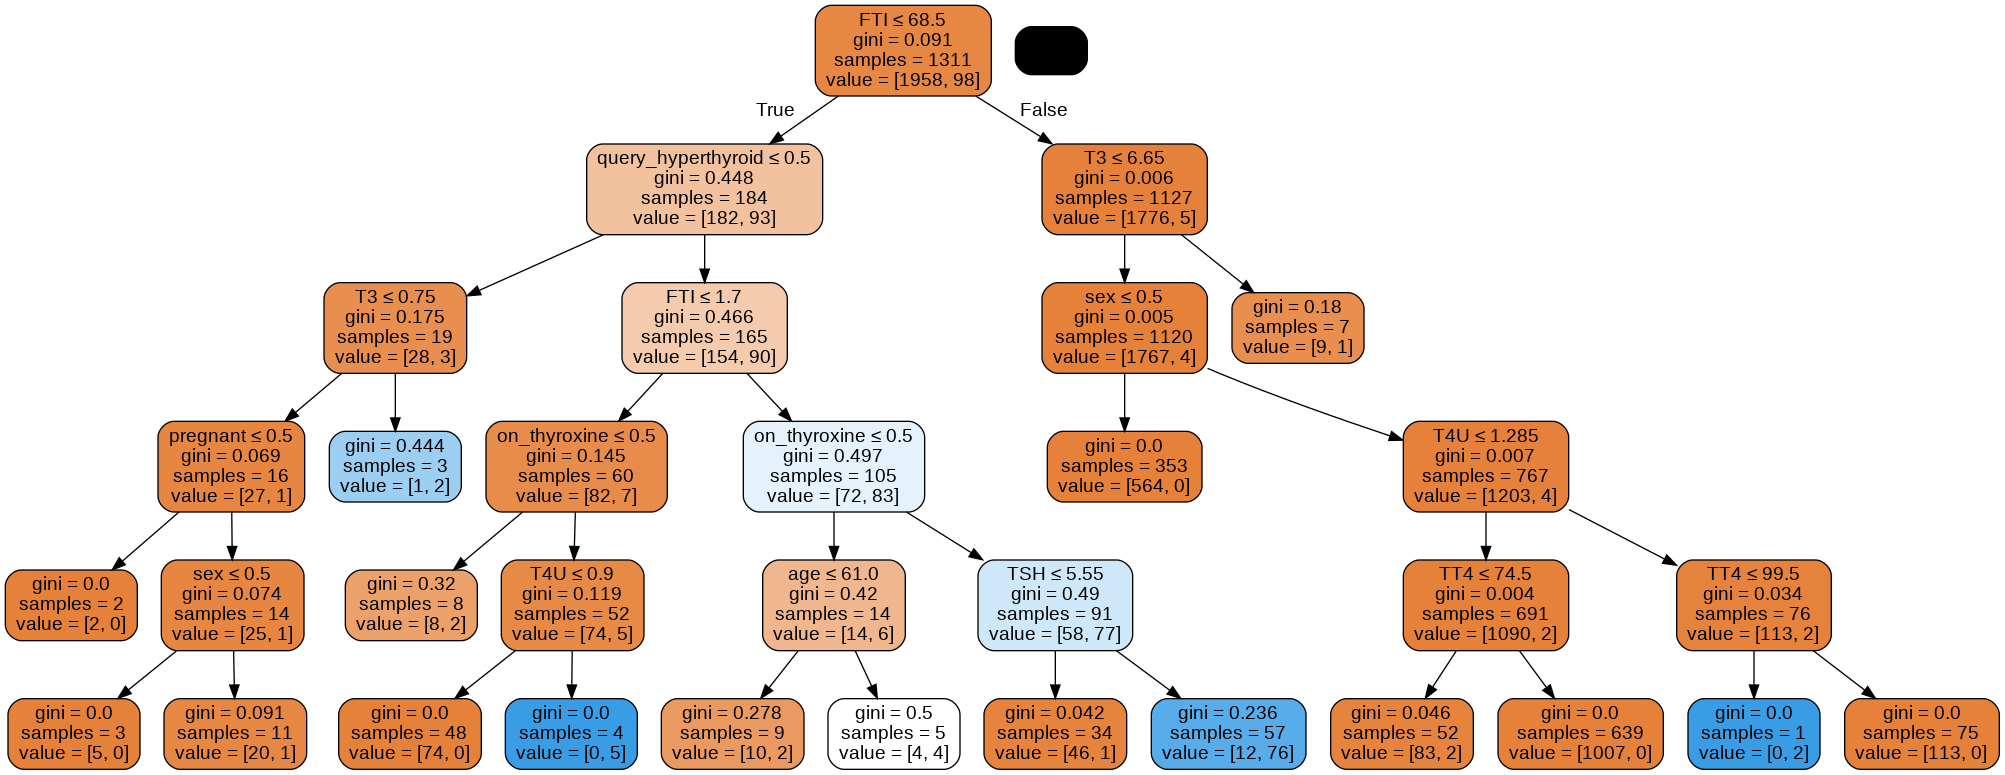

In [82]:
!pip install --upgrade scikit-learn==0.22
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus


dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[20]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid_Test.png')
Image(graph.create_png())

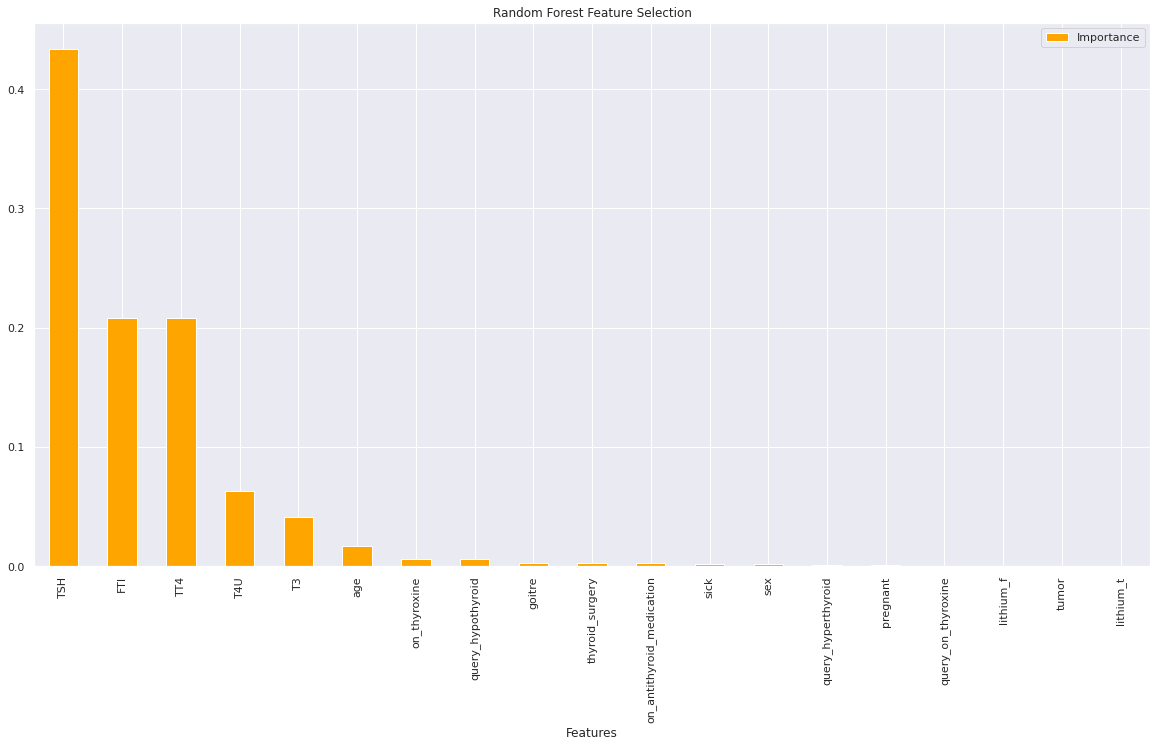

In [83]:
# Feature selection

pd.DataFrame({'Features' : X.columns, 'Importance' : forest.feature_importances_})\
.sort_values(by = 'Importance', ascending = False).set_index('Features')\
.plot.bar(title = 'Random Forest Feature Selection',figsize = (20, 10), color = 'orange')
plt.show()

**TSH, FTI, TTA, T3 and Age** are the most important features to consider while creating a prediction model. Thre are the most likely to tell the status of an individual

**Random Forest using the selecte features**

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X = hypothyroid_5[['TSH', 'FTI','TT4']].values
y = hypothyroid_5.status


# Split the independent and dependent variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Training and Cross Validation
# Import RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 10, max_depth=5)

forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


CF = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

CF.describe()


,Actual,Predicted
count,882.000000,882.000000
mean,0.040816,0.036281
std,0.197977,0.187095
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [85]:
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
print("R2 score : %.2f" % r2_score(y_test,y_pred))

print('accuracy_score:',accuracy_score (y_test , y_pred))

print('F1_score:',f1_score(y_test, y_pred))

R2 score : 0.83
accuracy_score: 0.9931972789115646
F1_score: 0.911764705882353


### b) **Ada Boosted Trees**

In [86]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

params = {'n_estimators' : [250, 300, 450, 500, 600]}

ada_boost = AdaBoostClassifier()

search = GridSearchCV(ada_boost, scoring = 'accuracy', param_grid = params, cv = 10)

search.fit(X, y)

search.best_params_

{'n_estimators': 250}

In [87]:
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=250, random_state=5)

ada_boost = ada_boost.fit(X_train, y_train)

y_pred_ada = ada_boost.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_ada))

print('F1_score:',f1_score(y_test, y_pred))

Accuracy score: 0.9897959183673469
F1_score: 0.911764705882353


### **c) Gradient Boosted Trees**

In [88]:
# Importing the relevant libraries

from sklearn.ensemble import GradientBoostingClassifier

target_number_of_trees = 250

gbc = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.001, max_depth=20)
gbc = gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred_ada))
print("R2 score : %.2f" % r2_score(y_test,y_pred_gbc))
print('F1_score:',f1_score(y_test, y_pred))
     

Accuracy score: 0.9897959183673469
R2 score : -0.04
F1_score: 0.911764705882353


# Approach 2: SVM

In [89]:
# Kernel = Polynomial
# Selecting the independent variables and the target variable
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

X = hypothyroid_5[['TSH', 'FTI','TT4']].values
y = hypothyroid_5.status

# Instantiating and creating a list of models for iteration
#
poly = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')

# Creating a list of the models and model names
#
models = [poly, linear, rbf]
model_names = ['Polynomial', 'Linear', 'Rbf']
# Creating a function that trains a model and returns its accuracy together with the model
#
def predictor(model, X, y):
  # Splitting the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
# Standardising the data
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
# Training the model and making predictions
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
# Measuring the accuracy of the model
  f1 = f1_score(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  f1 = [f1]
  # Returning the accuracy and the model
  return acc, f1, model  

In [90]:
# Gettiing our models accuracy score

for model, name in zip(models, model_names):
  print(f'The accuracy score of {name} is: {predictor(model, X, y)[0]} and the f1 score is: {predictor(model, X, y)[1]}')

The accuracy score of Polynomial is: 0.9852607709750567 and the f1 score is: [0.7868852459016393]
The accuracy score of Linear is: 0.9784580498866213 and the f1 score is: [0.6666666666666666]
The accuracy score of Rbf is: 0.9875283446712018 and the f1 score is: [0.8253968253968254]


RBF has the highest an accuracy score of 98.8 with and F1 score of 0.82.

# CONCLUSION & RECOMMENDATION



After reducing the features using feature importance technique and univariate feature selection
technique, we tested our collected dataset on various machine learning classifiers to see which classifier
gave us the best accuracy. After analyzing the data, we discovered that Random Forest classifier outperforms
all other classification algorithms for our dataset. When all features are considered, Logistic Regression
yields an accuracy score of 98.1 percent. When we use the feature importance method to narrow down
the features set, the Random Forest Classifier gives an accuracy score of 99.1 percent. The accuracy of
the Ada Boosted Classifier and the Gradient Boosting Classifier is 98.97 percent and 98.97 percent,
respectively. When we use the random forest feature selection technique to narrow down the features set,
Random Forest also gives the highest accuracy score of 99.3 percent. The feature importance technique was more accurate than the univariate feature selection technique in determining correlated
features. So, after looking at all of the performance metrics, we've decided that the Random Forest
Classifier, Ada Boosted trees, and Gradient Boosting Classifier and feature importance technique
might be potential choice for predicting Hypothyroidism and Hyperthyroidism.